In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../results/100seed_50k/metrics.csv')
df.head()

,width,depth,run,num_params,train_return,test_return,fim_trace
0,1024.0,3.0,0.0,2628612.0,0.807807,-0.141169,6905.831408
1,1024.0,3.0,1.0,2628612.0,0.758312,0.164386,1053.712870
2,1024.0,3.0,2.0,2628612.0,0.761962,0.005515,6906.626916
3,1024.0,4.0,0.0,3678212.0,0.743692,-0.142617,7927.695955
4,1024.0,4.0,1.0,3678212.0,0.804782,-0.157222,620.208714


In [11]:
df = df.groupby(['width', 'depth'], as_index=False).mean(numeric_only=True)
df.drop(columns=['run'], inplace=True)
df = df.sort_values(['depth', 'width'], ascending=False)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
print(df)

     width  depth  num_params  train_return  test_return     fim_trace
49  1024.0    7.0   6827012.0      0.707065    -0.093339   2476.827080
44   512.0    7.0   1840644.0      0.692117    -0.141954   5609.864396
39   256.0    7.0    527108.0      0.718323    -0.194481  14228.260972
34   128.0    7.0    165252.0      0.599970    -0.198657    501.834642
29    64.0    7.0     58052.0      0.740403    -0.094308   2983.211769
24    32.0    7.0     22884.0      0.708594    -0.404024   4958.430827
19    16.0    7.0      9908.0     -0.176701    -0.458670    293.656769
14     8.0    7.0      4572.0     -0.442167    -0.517779     32.699983
9      4.0    7.0      2192.0     -0.622380    -0.620445      9.077838
4      2.0    7.0      1074.0     -0.622463    -0.621253      2.427192
48  1024.0    6.0   5777412.0      0.771486    -0.146055   5392.457287
43   512.0    6.0   1577988.0      0.807658    -0.143435   1659.791329
38   256.0    6.0    461316.0      0.800952    -0.035377    118.981142
33   1

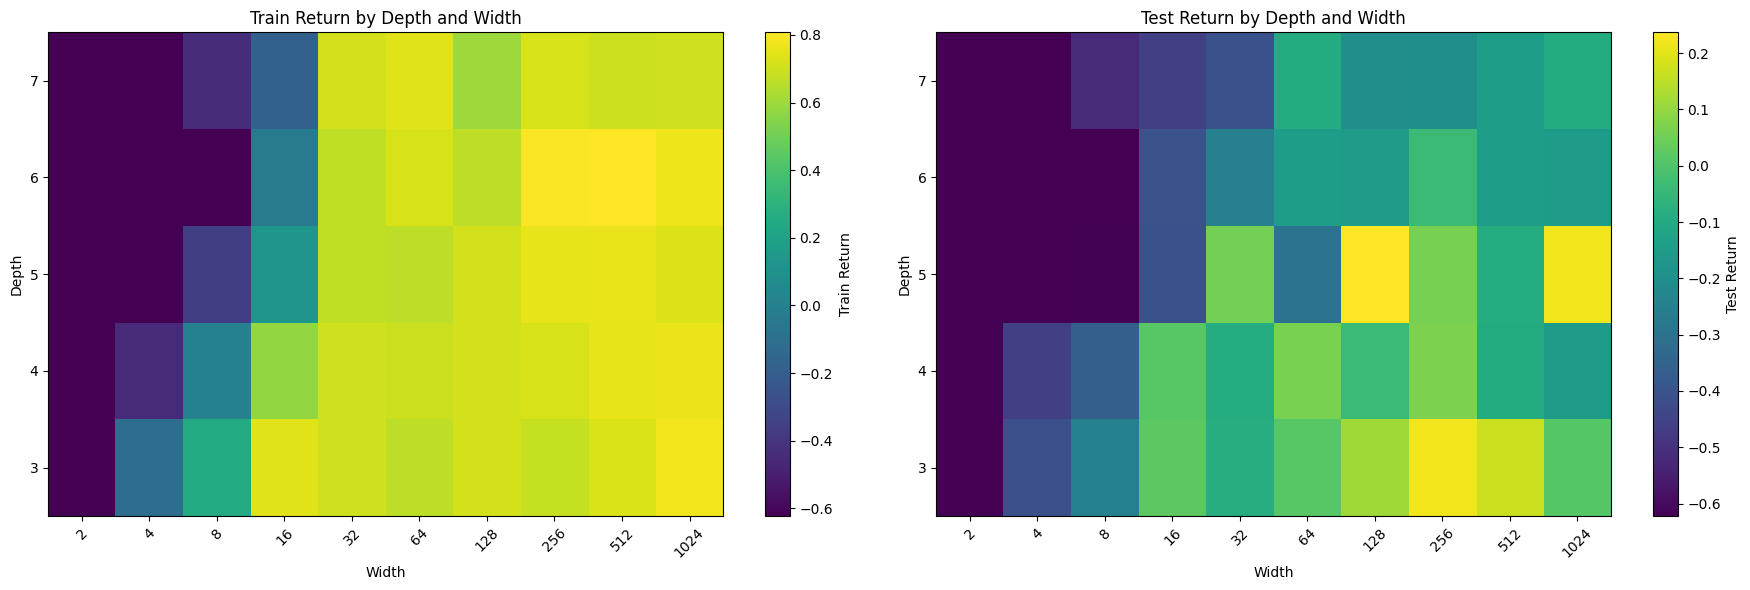

In [12]:
pivot_train = df.pivot(index='depth', columns='width', values='train_return')
pivot_test = df.pivot(index='depth', columns='width', values='test_return')

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

im0 = axes[0].imshow(pivot_train, aspect='auto', cmap='viridis', origin='lower')
# im0 = axes[0].imshow(pivot_train, aspect='auto', cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)
axes[0].set_title('Train Return by Depth and Width')
axes[0].set_xlabel('Width')
axes[0].set_ylabel('Depth')
axes[0].set_xticks(range(len(pivot_train.columns)))
axes[0].set_xticklabels(pivot_train.columns.astype(int), rotation=45)
axes[0].set_yticks(range(len(pivot_train.index)))
axes[0].set_yticklabels(pivot_train.index.astype(int))
fig.colorbar(im0, ax=axes[0], label='Train Return')

im1 = axes[1].imshow(pivot_test, aspect='auto', cmap='viridis', origin='lower')
# im1 = axes[1].imshow(pivot_test, aspect='auto', cmap='viridis', origin='lower', vmin=vmin, vmax=vmax)
axes[1].set_title('Test Return by Depth and Width')
axes[1].set_xlabel('Width')
axes[1].set_ylabel('Depth')
axes[1].set_xticks(range(len(pivot_test.columns)))
axes[1].set_xticklabels(pivot_test.columns.astype(int), rotation=45)
axes[1].set_yticks(range(len(pivot_test.index)))
axes[1].set_yticklabels(pivot_test.index.astype(int))
fig.colorbar(im1, ax=axes[1], label='Test Return')

plt.tight_layout()
plt.show()